<img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width ="301.5" height=216>

In [1]:
# Welcome back to Jupyter - run this cell to test that everything works before the workshop

print('Welcome back to Jupyter!')

import pandas
pandas.read_csv('advertising.csv')

print("""If there are no error messages here, you're almost ready for the workshop!""")

print("""
Before the workshop look for some data that you think would be appropriate for logistic regression analysis.

Logistic regression works similarly to linear regression, but the dependent 
variable is binary.
""")

Welcome back to Jupyter!
If there are no error messages here, you're almost ready for the workshop!

Before the workshop look for some data that you think would be appropriate for logistic regression analysis.

Logistic regression works similarly to linear regression, but the dependent 
variable is binary.



# Logistic Regression in Python

<a id='Contents'></a>
## Contents
In this workshop, we will:<b>

- [Import](#import) some data from csv files 
- [Explore](#explore) the data
- [Propose](#propose) a hypothesis
- [Build](#build) the model 
- [Interpret](#interpret) the model results

</b>

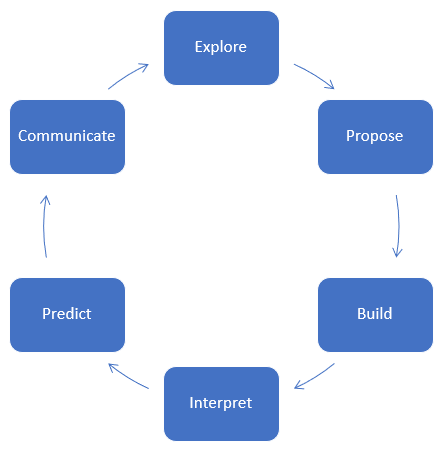

<a id="import"></a>
# Import packages and read data
[Back to Contents](#Contents)

In this section, we will import the packages that we will need later. In this case, there is are a few: 
- **pandas**: this should now be familiar
- **matplotlib.pyplot**: this is a package for plotting graphs
- **sklearn.model_selection**: we use this to split the data into sets
    actually, we only need one function from this package, so to make things easier, we'll only import that function
- **statsmodels.api**: we use this to build the model
- **sklearn.metrics**: we use this to score the model

In [3]:
# Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics

**Task**: Create a **new code cell**, read the data in *'advertising.csv'* and assign it the label *advertising*.

<details>
    <summary style="color:green;font-weight:bold">Click here for a hint</summary>
    
Use the `read_csv()` function from the pandas package.

</details>

Logistic Regression is best suited for using numerical independent variables to predict a **binary** dependent variable, so we will cut down our data to just the relevant fields:
- Daily Time Spent on Site
- Age
- Area Income
- Daily Internet Usage
- Clicked on Ad

We hope to be able to use the four numerical variables to predict the binary field *Clicked on Ad*.

There are a few ways that you can do this step - here's one way:
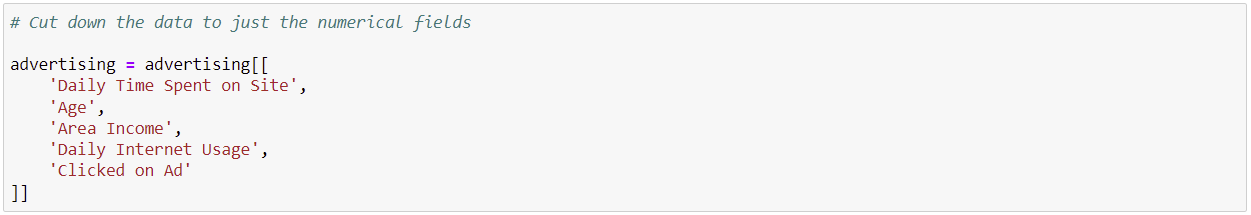

**Task**: Create a **new code cell** and (using any method you like), reduce the data to just the numerical fields.

---

In [4]:
# Exercise: Find and read in some appropriate data

advertising = pd.read_csv('advertising.csv')
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Clicked on Ad
0,68.96,35,61833.90,256.09,Cloned 5thgeneration orchestration,Paisley,Female,Scotland,27/03/2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,Southampton,Male,England,04/04/2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Newcastle,Female,England,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,Southampton,Male,England,10/01/2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,Sheffield,Female,England,03/06/2016 03:36,0


In [5]:
# Exercise: Cut your data down to just the relevant fields
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Sex                       1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


In [14]:
advertising.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,30,2,3,997,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Birmingham,Female,England,26/05/2016 15:40,NaN
freq,NaN,NaN,NaN,NaN,1,45,519,365,2,NaN
mean,65.000210,36.009000,55000.000080,180.000100,NaN,NaN,NaN,NaN,NaN,0.50000
std,15.853617,8.785562,13414.634022,43.902339,NaN,NaN,NaN,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,NaN,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,NaN,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,NaN,NaN,NaN,1.00000


In [20]:
advertising['Country'] = pd.Categorical(advertising['Country'])
advertising['City'] = pd.Categorical(advertising['City'])
advertising['Sex'] = pd.Categorical(advertising['Sex'])

In [26]:
advertising['Country_codes'] = advertising['Country'].cat.codes
advertising['City_codes'] = advertising['City'].cat.codes
advertising['Sex_codes'] = advertising['Sex'].cat.codes

In [27]:
advertising.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Clicked on Ad,Country_codes,City_codes,Sex_codes
0,68.96,35,61833.90,256.09,Cloned 5thgeneration orchestration,Paisley,Female,Scotland,27/03/2016 00:53,0,1,23,0
1,80.23,31,68441.85,193.77,Monitored national standardization,Southampton,Male,England,04/04/2016 01:39,0,0,26,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Newcastle,Female,England,13/03/2016 20:35,0,0,20,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,Southampton,Male,England,10/01/2016 02:31,0,0,26,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,Sheffield,Female,England,03/06/2016 03:36,0,0,25,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Newport,Male,Wales,19/05/2016 14:30,0,2,21,1
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Liverpool,Female,England,28/01/2016 20:59,0,0,15,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Hamilton,Male,Scotland,07/03/2016 01:40,1,1,13,1
8,74.53,30,68862.00,221.51,Configurable coherent function,Nottingham,Male,England,18/04/2016 09:33,0,0,22,1
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Nottingham,Male,England,11/07/2016 01:42,0,0,22,1


---
<a id="explore"></a>
# Exploring the data
[Back to Contents](#Contents)

Next, we will explore the data. Just like with linear regression, we need to check:
- pairwise correlations between the independent variables
- relationships between the independent variables and *Clicked on Ad*

The syntax for finding the pairwise correlations is:
> DataFrame.corr()

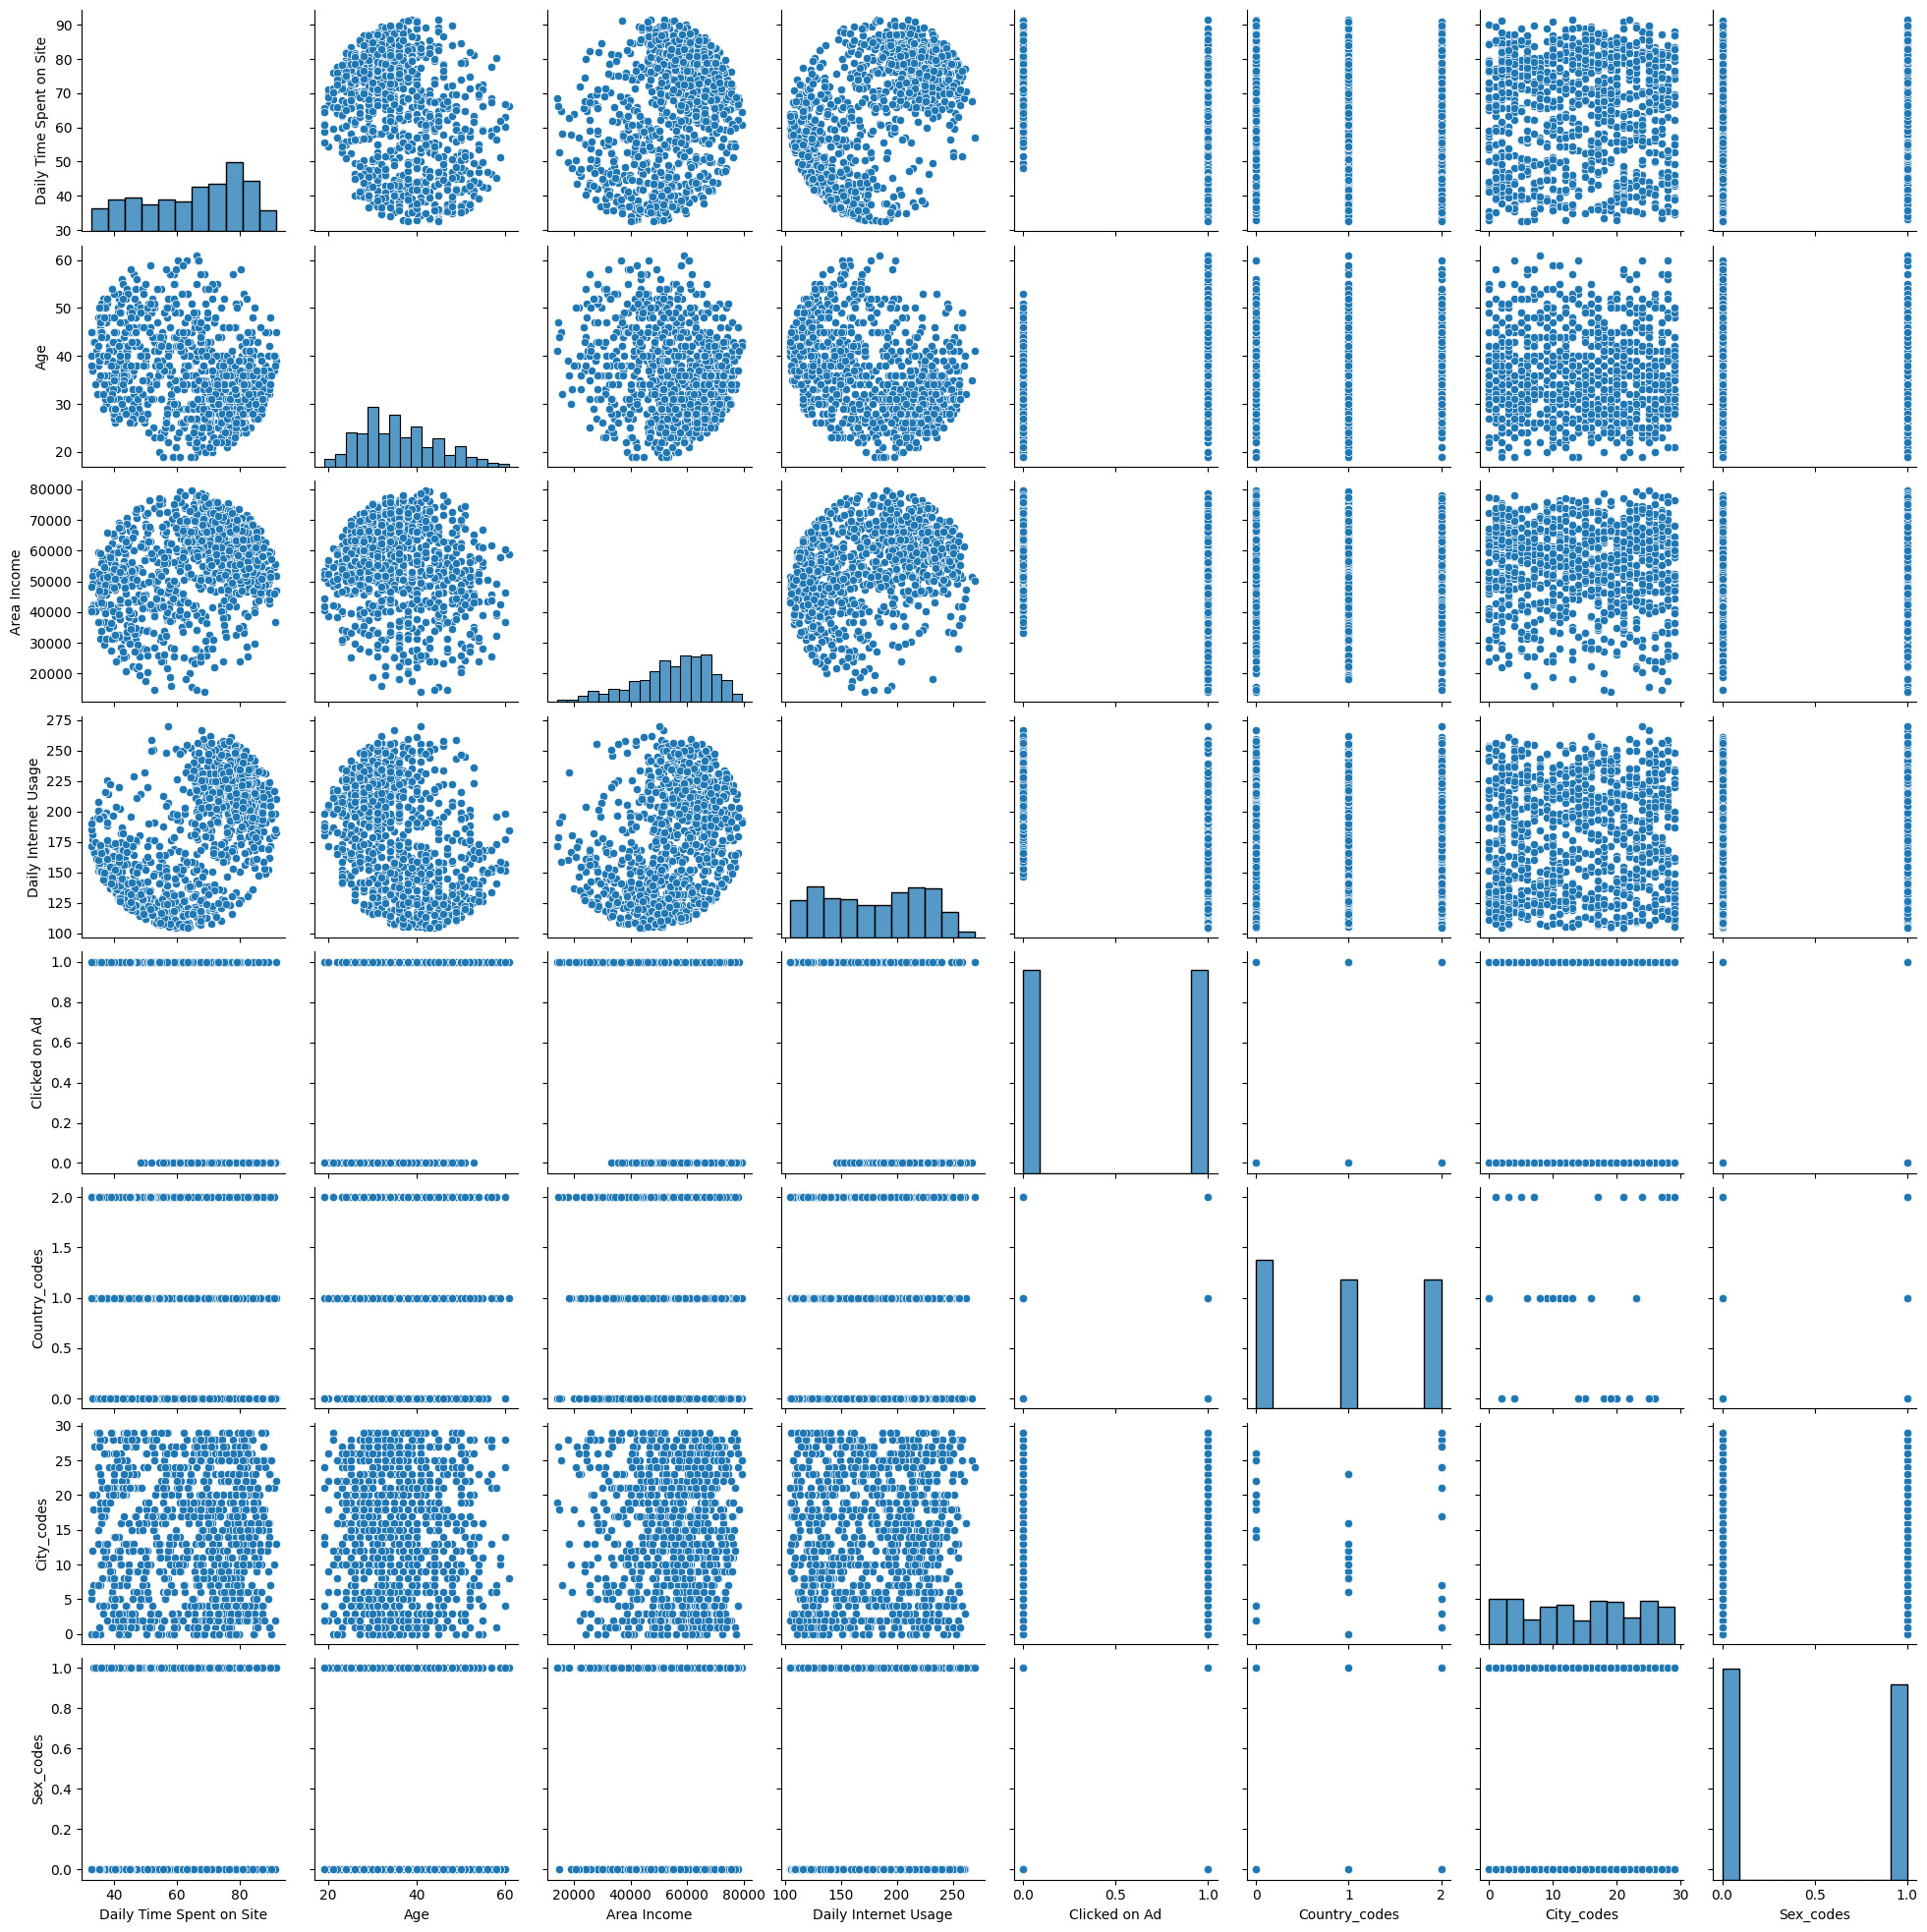

In [34]:
# Task: Find the pairwise correlations in the fields of the advertising DataFrame

sns.pairplot(advertising) # perhaps not the best way to explore

In [35]:
advertising.columns

# target = 'Clicked on Ad'

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Sex', 'Country',
       'Timestamp', 'Clicked on Ad', 'Country_codes', 'City_codes',
       'Sex_codes'],
      dtype='object')

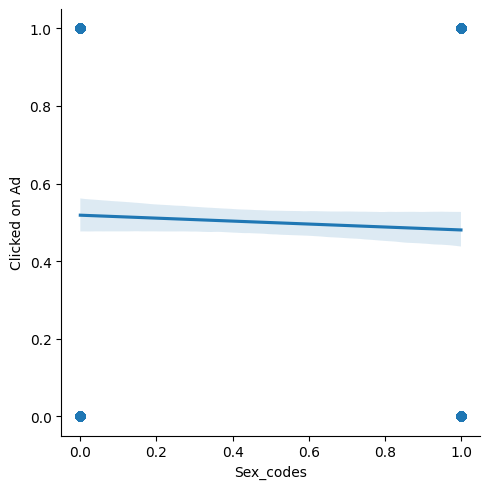

In [47]:
sns.lmplot(advertising, x = 'Sex_codes', y = 'Clicked on Ad', logistic=True)

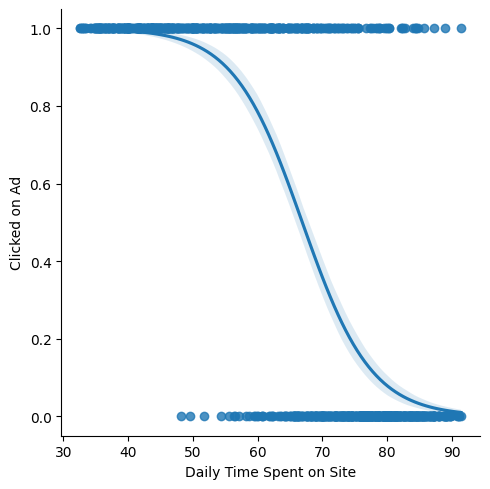

In [50]:
sns.lmplot(advertising, x = 'Daily Time Spent on Site', y = 'Clicked on Ad', logistic=True)

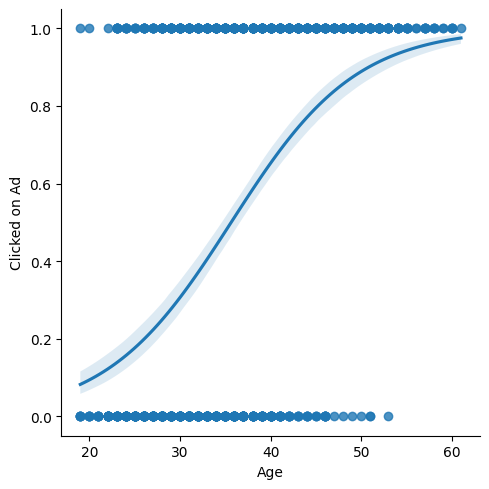

In [56]:
sns.lmplot(advertising, x = 'Age', y = 'Clicked on Ad', logistic=True)

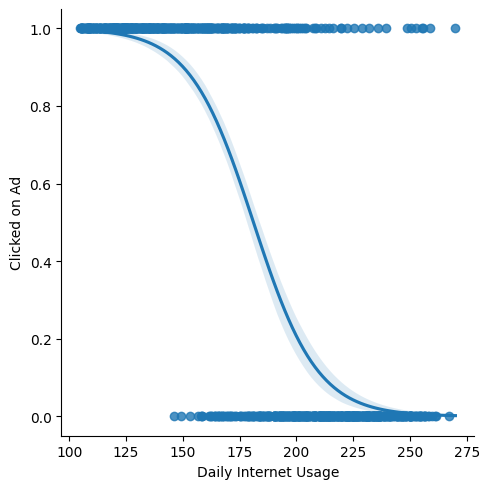

In [74]:
sns.lmplot(advertising, x = 'Daily Internet Usage', y = 'Clicked on Ad', logistic=True)

In [7]:
# Find out the differences in people who did/didn't click on the ad

advertising.groupby('Clicked on Ad').mean()

From the aggregation table, we can see that there are differences in the averages of people who did and didn't click on the ad. *(We can find the standard deviation using .std() to see if these differences are significant.)*

This suggests that we may be able to use these fields to predict whether the individual clicked on the ad. However, since the correlations between the independent variables are so high, we won't be able to test more than one independent variable at a time.

In [ ]:
plt.scatter(
    advertising['Daily Time Spent on Site'],
    advertising['Clicked on Ad']
)

In [ ]:
# Exercise: Find the pairwise correlations in your data



---
<a id="propose"></a>
# Propose an hypothesis
[Back to Contents](#Contents)

Key Terms:
- **Hypothesis**: the assumption we want to test
- **Test**: an event which impacts the probability of the hypothesis
- **Null Hypothesis**: the base assumption ("innocent until proven guilty")

In our case, the hypothesis will be: as daily time on site decreases, the likelihood of clicking on the ad increases.

As our test, we will examine the data we have collected.

Our Null Hypothesis is: there is no negative relationship between daily time on site and likelihood to click on ad.

---

Now, we check that our hypothesis is a business-relevant question. 

**Questions:** Are customers who spend longer on the site less likely to click on the ad?

**Discussion:** Is this question business-relevant? What would the potential outcomes of this experiment be? What stakeholders would be interested?

Finally, we need to make sure that we have enough data to answer the question. A model requires **at least 30 data points per parameter** to be robust. In our case, the model will have 2 parameters (as we will see later in the summary: 1 independent variable and a constant), so we will need at least 60 data points.

<div class="alert alert-block alert-info">
<b>Research Task:</b> <ul>
<li> Why 30?
</ul></div>

**Task**: Find out how many non-null data points there are in the *advertising* DataFrame using the code:
> advertising.info()

In [ ]:
# Display the amount of data available using the .info method
# Write your hypothesis

# The older you get you are more likely to click on the ad - this means your coefficient should be positive
# the more you spend time on the app the less likely you are to click on ad - this mean negative coefficient



<div class="alert alert-block alert-info">
<b>Research Task:</b> <ul>
<li> What methods are available for working with or dropping nulls from a DataFrame?
</ul></div>

<div class="alert alert-block alert-info">
<b>Exercise & Discussion Task:</b> <ul>
<li> Propose a hypothesis using your data. Define your null hypotheses. Check that the data is sufficient to test the hypothesis.
<li> Discuss the business relevance of your proposal.
</ul>
</div>

---
<a id="build"></a>
# Build the model
[Back to Contents](#Contents)

In this section, we will build the model to compare the Daily Time Spent on Site to the Clicked on Ad. For this, we will use a logistic regression model.

We will follow the following steps in this process:
- split the data into train and test
- build the model

#### Split the data into train and test

We want to know that our model can apply to customers outside of the data we have available.

To be sure that our model can be applied to new data, before we build the model, we split the data into train data (used to build the model) and test data (used to test that the model works).

Luckily, there's an easy way to do this with **sklearn**!

The syntax for splitting the data into train and test is:
> train, test = train_test_split(DataFrame)

In [57]:
# Split the data into train and test

train, test = train_test_split(
    advertising,
    random_state = 13 # this fixes so that we get the same answer each time
)

In [59]:
# Exercise: Split your data into train and test

train.shape, test.shape

((750, 13), (250, 13))

#### Build the model

Now we build the model.

The syntax for building a logistic regression model is:
> model = sm.Logit(<br>
&nbsp;&nbsp;&nbsp;&nbsp;TrainDataFrame['dependent variable'],<br>
&nbsp;&nbsp;&nbsp;&nbsp;TrainDataFrame[['independent variable 1','independent variable 2',...]]<br>
).fit()

The *Logit* function instantiates the model and then the *.fit()* method on the model object fits the parameters to the data.

**Task**: Create a **new code cell**, create a logistic regression model and fit it to the data.

<details>
    <summary style="color:green;font-weight:bold">Click here for a hint</summary>
    
- First, identify the dependent variable and the independent variables
- Use the function `sm.Logit()` to instantiate the model
- Use the `.fit()` method to fit the model to the data
</details> 

<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>
    
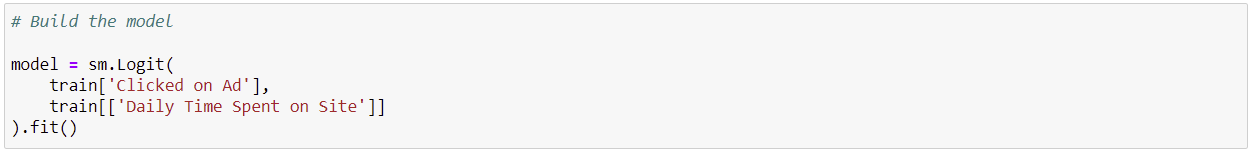

</details>

In [70]:
X = train[['Daily Time Spent on Site', 'Age']]
X = sm.add_constant(X)
y = train['Clicked on Ad']

model = sm.Logit(y, X).fit()


Optimization terminated successfully.
         Current function value: 0.265547
         Iterations 8


In [71]:
# Print model summary statistics

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked on Ad   No. Observations:                  750
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.6169
Time:                        15:46:37   Log-Likelihood:                -199.16
converged:                       True   LL-Null:                       -519.85
Covariance Type:            nonrobust   LLR p-value:                5.326e-140
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.8097      0.991      6.869      0.000       4.867       8.753
Daily Time Spent on Site    -0.1802      0.014    -12.835      0.000      -0.208      -0.153
Age                          0.1503      0.017      8.861      0.000       0.117       0.184
============================================================================================
"""

In [78]:
X = train[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Country_codes']]
# Standardize the range of values in X

X = sm.add_constant(X)

y = train['Clicked on Ad']

model = sm.Logit(y, X).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.081951
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked on Ad   No. Observations:                  750
Model:                          Logit   Df Residuals:                      744
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.8818
Time:                        15:50:35   Log-Likelihood:                -61.463
converged:                       True   LL-Null:                       -519.85
Covariance Type:            nonrobust   LLR p-value:                6.237e-196
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       28.1055      3.465      8.112      0.000      21.315      34.896
Daily Time Spent on Site    -0.1969      0.025     -7.861      0.000      -0.246      -0.148
Age                          0.1836      0.031      5.987      0.000       0.123       0.244
Area Income                 -0.0001   2.19e-05     -6.317      0.000      -0.000   -9.55e-05
Daily Internet Usage        -0.0728      0.009     -7.952      0.000      -0.091      -0.055
Country_codes                0.6319      0.291      2.169      0.030       0.061       1.203
============================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [79]:
X.describe()

,const,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Country_codes
count,750.0,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.0,65.206707,36.248000,55134.303747,180.495853,0.948000
std,0.0,15.852416,8.925734,13667.555414,43.212469,0.824339
min,1.0,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,1.0,51.995000,29.000000,46993.367500,140.485000,0.000000
50%,1.0,68.605000,35.000000,57343.140000,183.130000,1.000000
75%,1.0,78.525000,42.000000,65832.860000,218.927500,2.000000
max,1.0,91.430000,61.000000,79484.800000,269.960000,2.000000


In [80]:
0.0001 * 79000

7.9

In [83]:
0.36 * 2

0.72

In [ ]:
# Task: Add a constant to the model and rebuild

independent_vars = train[['Daily Time Spent on Site']]
independent_vars = sm.add_constant(independent_vars)



<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>
    
> independent_vars = train[['Daily Time Spent on Site']]<br>
independent_vars = sm.add_constant(independent_vars)<br>
model = sm.Logit(<br>
&nbsp;&nbsp;&nbsp;&nbsp;train['Clicked on Ad'], <br>
&nbsp;&nbsp;&nbsp;&nbsp;independent_vars<br>
).fit()
    

</details>

In [ ]:
# Exercise: Build a model using your data, including a constant



---
<a id="interpret"></a>
# Interpret the model results
[Back to Contents](#Contents)

In this section, we will interpret the model results. We'll start with the summary statistics printed above and then we will examine how well the model fits the train data.

<div>
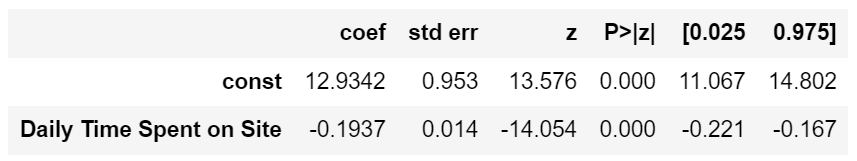
</div>

The p-value is the probability of the null hypothesis (no negative relationship) being true. In this case, the p-value is very small so we can accept that our hypothesis is true: **there is a negative relationship between Daily Time Spent on Site and the probability of Clicked on Ad**.

Next, we compare the effectiveness of the model when applied to the test data. This is a good way of ensuring that our model works well on data it hasn't seen before.

First, we use the model to predict the test data. Then we compare it to the actual test data.

The syntax for predicting using the model is:
> model.predict(TestDataFrame)

This gives the probability of a value of 1 for each row of the test data.

In [ ]:
# Predict the model results on the test data

predicted = model.predict(
    sm.add_constant(test[['Daily Time Spent on Site']])
)

We then take any prediction with probability $>= 0.5$ to be Positive.

There are now 4 possibilities:
- the model says Negative (0) and the actual value is Negative (0)
- the model says Negative (0) and the actual value is Positive (1)
- the model says Positive (1) and the actual value is Negative (0)
- the model says Positive (1) and the actual value is Positive (1)

We represent these 4 possibilities in a confusion matrix.

<div>
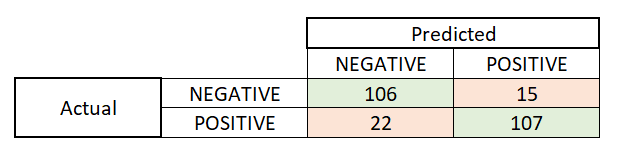
</div>

The confusion matrix lets us calculate:
- the False Positive Rate (FPR)
$$\frac{15}{(15+106)}=12\%$$
- the True Positive Rate (TPR)
$$\frac{107}{(22+107)}=83\%$$

The syntax for constructing the confusion matrix is:
> metrics.confusion matrix(test_values,predicted_values)

In [ ]:
# Construct the confusion matrix for the logistic regression model

metrics.confusion_matrix(test['Clicked on Ad'],predicted>=0.5)

A model which is **always positive** will have a 100% False Positive Rate but a 100% True Positive Rate.

A model which is **always negative** will have a 0% False Positive Rate but a 0% True Positive Rate.

It's important to balance the two in order to achieve an effective model.

##### ROC Curve

The ROC shows the trade-off between the False Positive Rate and the True Positive Rate. It puts the data in order of the probability of a positive result and then shows the True Positive Rate vs False Positive rate as we move through the data.

In [ ]:
# Plot the ROC Curve

fpr, tpr, _ = metrics.roc_curve(test['Clicked on Ad'],predicted)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--',color='grey')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

When the curve starts, it should go up, rather than across (i.e. the data which has the highest modelled probability of being positive should be True Positive).

Therefore, the **best** way for the curve to look would be to go straight **up** and then straight **across**.

We've also plotted the base model on the ROC, which appears as a straight line from $(0,0)$ to $(1,1)$.

We can quantify how good the model is in a single score: the Area Under the Curve (AUC). The AUC Score varies from 0 to 1, with 1 being the best. If the score is less than $\frac12$, then the model is worse than the base model.

The syntax for calculating the AUC Score is:
> metrics.roc_auc_score(test,prediction)

In [ ]:
# Calculate the AUC Score

metrics.roc_auc_score(test['Clicked on Ad'],predicted)

In [ ]:
# Exercise: Calculate and interpret the AUC Score for your model



<div class="alert alert-block alert-info">
<b>Exercise & Discussion Task:</b> <ul>
<li> Print and interpret your model summary statistics.
<li> Discuss the business relevance of your results.
</ul>
</div>

### Feedback Forms

Click [here](https://forms.corndel.com/workshopfeedback/?prog=DA&unit=DA11) or scan the QR code for the feedback form.

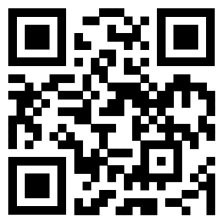